#**Seoul Bike Trip**

The most basic metric for all forms of transportation is trip length. Therefore, accurate trip-time prediction is essential for the development of Intelligent Transportation Systems (ITS) and traveller information systems. In order to forecast the duration of a journey, we used certain optimized data mining techniques  to forecast the duration of trips involving rental bikes in the bike-sharing programme in Seoul. The forecast is made using a combination of weather data and Pickup and Drop location data.

# Introduction

Importing all the basic libraries needed for the project

In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For plotting
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("For_modeling.csv")
print(df.shape)

(3097212, 26)


There are 9.7million data instances and 26 features as per now.

In [125]:
df.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,3.097212e+06,3.097212e+06,3.097212e+06,3.097212e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,...,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06,3.097211e+06
mean,1.588414e+06,2.707788e+01,3.847974e+03,3.754799e+01,1.269895e+02,3.754806e+01,1.269894e+02,1.950396e+00,4.398133e+00,1.534678e+01,...,3.001456e+01,2.913837e+00,1.648089e+01,1.204726e-02,2.086519e+00,5.052070e+01,9.239224e-01,1.167085e-02,1.962102e+01,4.044237e+01
std,9.202126e+05,2.524699e+01,3.943801e+03,4.732982e-02,8.018886e-02,4.312316e-02,8.082733e-02,2.051381e+00,1.396178e+00,8.762749e+00,...,1.732307e+01,1.998974e+00,8.582066e+00,3.339632e-01,1.026282e+00,1.790614e+01,1.024126e+00,1.475914e-01,1.272904e+01,2.728357e+01
min,0.000000e+00,2.000000e+00,1.000000e+01,3.000000e+00,1.267986e+02,3.744334e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.901328e+05,8.000000e+00,1.300000e+03,3.751729e+01,1.269211e+02,3.751729e+01,1.269201e+02,6.929189e-01,4.000000e+00,8.000000e+00,...,1.500000e+01,1.000000e+00,1.210000e+01,0.000000e+00,1.300000e+00,3.700000e+01,0.000000e+00,0.000000e+00,1.130000e+01,2.100000e+01
50%,1.586964e+06,1.800000e+01,2.450000e+03,3.754815e+01,1.269875e+02,3.754787e+01,1.269875e+02,1.321161e+00,5.000000e+00,1.500000e+01,...,3.000000e+01,3.000000e+00,1.870000e+01,0.000000e+00,2.000000e+00,5.000000e+01,5.200000e-01,0.000000e+00,1.920000e+01,3.600000e+01
75%,2.386251e+06,3.900000e+01,4.910000e+03,3.757324e+01,1.270579e+02,3.757325e+01,1.270598e+02,2.518386e+00,6.000000e+00,2.200000e+01,...,4.500000e+01,5.000000e+00,2.260000e+01,0.000000e+00,2.800000e+00,6.300000e+01,1.690000e+00,0.000000e+00,2.700000e+01,5.500000e+01
max,3.180713e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,6.000000e+00,3.100000e+01,...,5.900000e+01,6.000000e+00,3.070000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,4.100000e+00,5.530000e+01,3.040000e+02


In [126]:
df.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.
1. Trip Duration: It represents the duration of a bike trip in some unit of time, such as minutes or seconds.
1. Trip Distance: The distance covered during the bike trip, typically measured in kilometers or miles. This feature can help in understanding how trip duration relates to the distance traveled.
1. Pickup and Dropoff Latitude and Longitude: These are geographical coordinates representing the exact location where the bike trip starts (pickup) and ends (dropoff). Latitude and longitude are used to pinpoint specific locations on the Earth's surface.
1. Temperature: The temperature at the time of the trip, usually measured in degrees Celsius or Fahrenheit. It can provide insights into how weather conditions affect trip duration.
1. Precipitation: This feature indicates whether there was any form of precipitation (rain, snow, etc.) during the trip. It's often represented as a binary variable (0 for no precipitation, 1 for precipitation).
1. Wind Speed: The speed of the wind at the time of the trip, measured in units like kilometers per hour (km/h) or meters per second (m/s). Wind speed can influence the ease of cycling.
1. Humidity: The level of moisture or humidity in the air during the trip, often represented as a percentage. High humidity can affect comfort during cycling.
1. Solar Radiation: Solar radiation measures the amount of energy received from the sun during the trip. It's typically measured in watts per square meter (W/m²) and can impact temperature and weather conditions.
1. Snowfall: Indicates whether there was snowfall during the trip, usually represented as a binary variable (0 for no snowfall, 1 for snowfall). Snowfall can significantly affect road conditions and trip duration.
1. Ground Temperature: The temperature of the ground or road surface at the time of the trip. This can be important, especially in cold or icy conditions.
1. 1-Hour Average Dust Concentration: This feature represents the concentration of particulate matter (dust) in the air, typically measured in micrograms per cubic meter (µg/m³). It provides information about air quality, which can affect health and comfort during the trip.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097212 entries, 0 to 3097211
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      float64
 9   Pday        float64
 10  Phour       float64
 11  Pmin        float64
 12  PDweek      float64
 13  Dmonth      float64
 14  Dday        float64
 15  Dhour       float64
 16  Dmin        float64
 17  DDweek      float64
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(23), int64(3)
memory usage: 614.4 MB


In [128]:
#Randomly selecting 4,00,000 data instances
df = df.sample(n = 400000)

# Datamining Techniques

## Data preprocessing

Here we started by checking with the null values of the data set.

In [129]:
df.isnull().sum()

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There are very few null values with respect to such a large dataset. We can either delete them or replace them by zero, mean, median or mode values. But as the number of null values are negligible we chose to remove them.

In [130]:
# dropping the null values
df = df.dropna()

In [131]:
# cross verifying for null values
df.isnull().sum()

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

Next step would to to understand the dataset and thus detecting any outliers or anomaly present.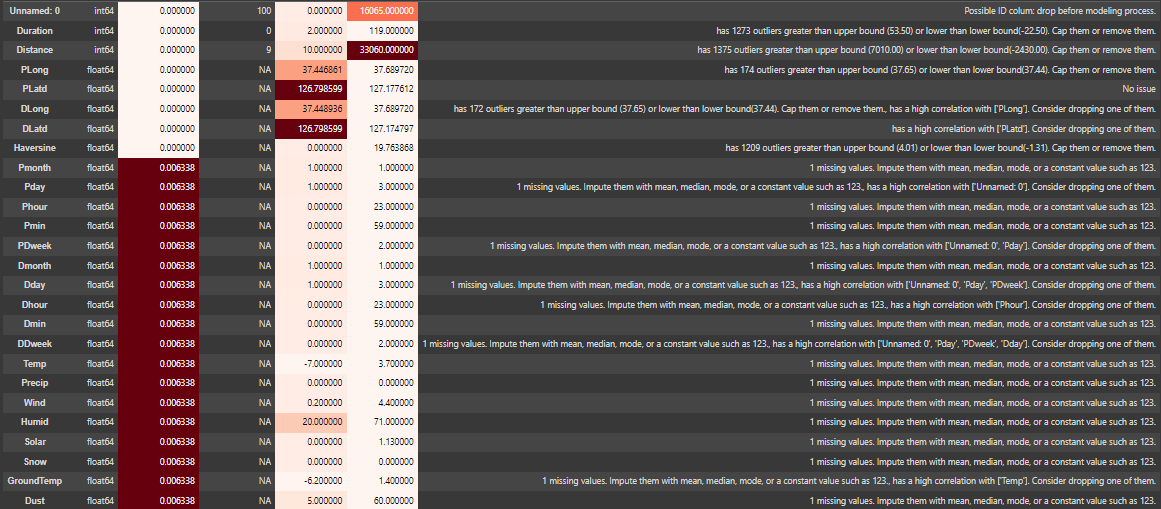

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Duration'>

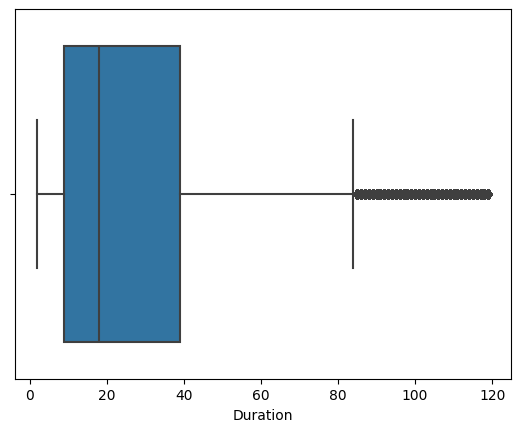

In [132]:
#Using the box-plots to detect outliers.
# Duration
sns.boxplot(x=df['Duration'])

In [133]:
print(max(df.Duration))
print(min(df.Duration))
print(np.mean(df.Duration))


119
2
27.0435625


In [134]:
#Removing the outliers from the trip duration
# As per the method taught in class to eliminate the outliers.
mean = np.mean(df['Duration'])
std = np.std(df['Duration'])
df = df[df['Duration']<= mean+3*std]
df = df[df['Duration']>= mean-3*std]

<Axes: xlabel='Duration'>

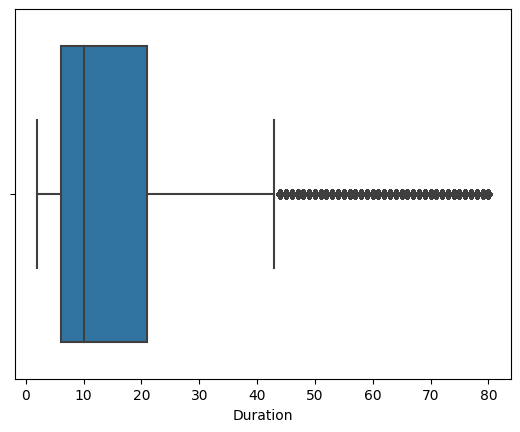

In [ ]:
# after removing the outliers
sns.boxplot(x=df['Duration'])

<Axes: xlabel='Distance'>

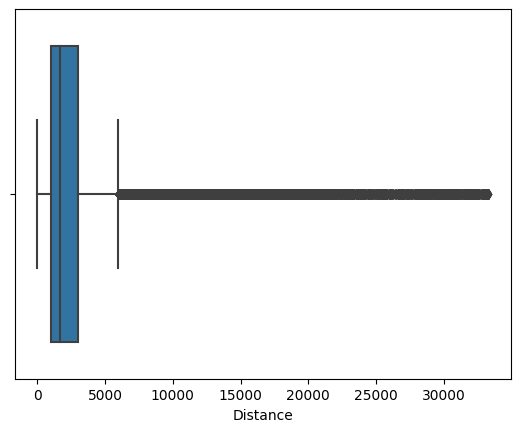

In [ ]:
# Using the box-plots to detect outliers.
sns.boxplot(x=df['Distance'])

In [135]:
print(max(df.Distance))
print(min(df.Distance))
print(np.mean(df.Distance))

33280
10
3681.8767604464438


In [136]:
#Removing the outliers from the trip Distance
mean = np.mean(df['Distance'])
std = np.std(df['Distance'])
df = df[df['Distance']<= mean+3*std]
df = df[df['Distance']>= mean-3*std]

<Axes: xlabel='Distance'>

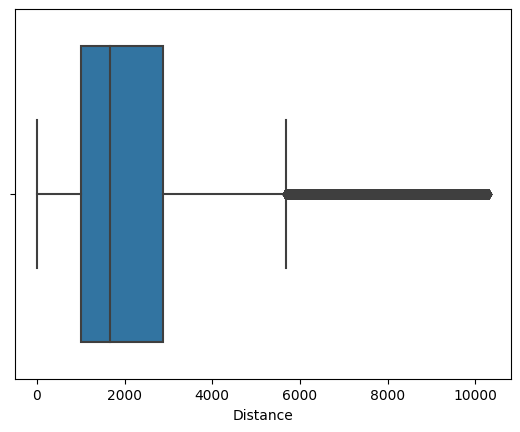

In [ ]:
sns.boxplot(x=df['Distance'])

<Axes: xlabel='PLong'>

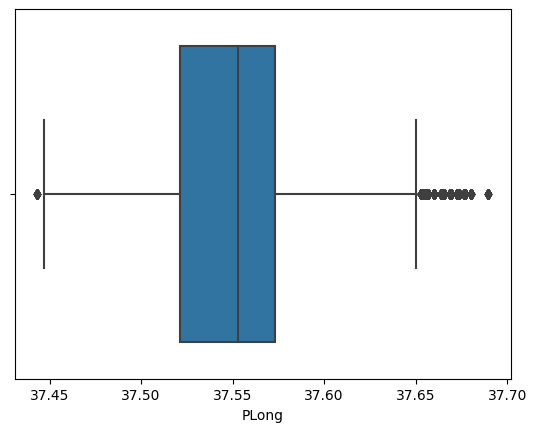

In [ ]:
sns.boxplot(x=df['PLong'])

In [137]:
print(max(df.PLong))
print(min(df.PLong))
print(np.mean(df.PLong))

37.68972
37.44334
37.54824013473982


In [138]:
#Removing the outliers from the trip PLong
mean = np.mean(df['PLong'])
std = np.std(df['PLong'])
df = df[df['PLong']<= mean+3*std]
df = df[df['PLong']>= mean-3*std]

In [139]:
print(max(df.PLong))
print(min(df.PLong))
print(np.mean(df.PLong))
print(df.shape)

37.676941
37.44334
37.54807827277591
(383102, 26)


<Axes: xlabel='PLong'>

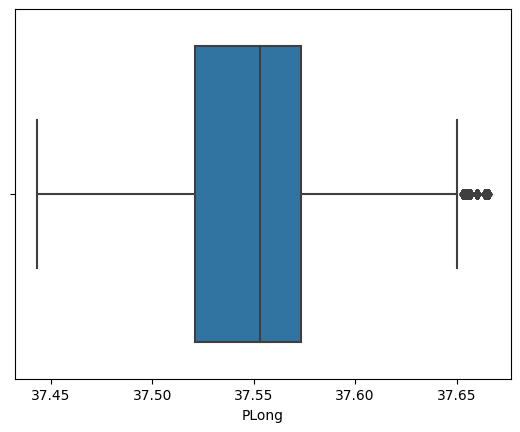

In [ ]:
sns.boxplot(x=df['PLong'])

<Axes: xlabel='Haversine'>

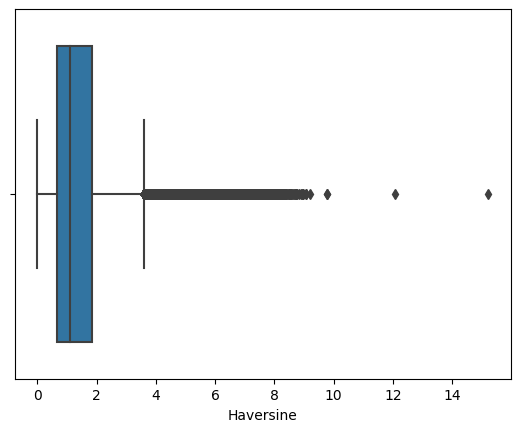

In [ ]:
sns.boxplot(x=df['Haversine'])

In [140]:
print(max(df.Haversine))
print(min(df.Haversine))
print(np.mean(df.Haversine))

19.30337584715941
0.0
1.8550008854919127


In [141]:
#Removing the outliers from the trip PLong
mean = np.mean(df['Haversine'])
std = np.std(df['Haversine'])
df = df[df['Haversine']<= mean+3*std]
df = df[df['Haversine']>= mean-3*std]

In [142]:
print(max(df.Haversine))
print(min(df.Haversine))
print(np.mean(df.Haversine))
print(df.shape)

7.138642557620889
0.0
1.7145602727863647
(375128, 26)


<Axes: xlabel='Haversine'>

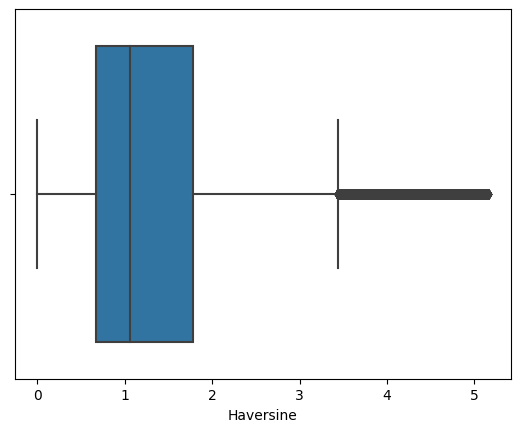

In [ ]:
sns.boxplot(x=df['Haversine'])

<Axes: xlabel='DLong'>

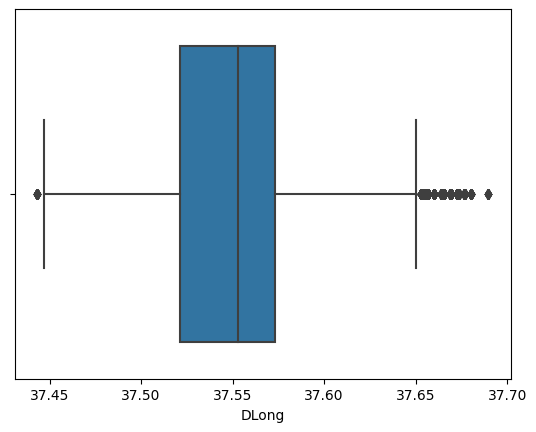

In [ ]:
sns.boxplot(x=df["DLong"])

In [143]:
print(max(df.DLong))
print(min(df.DLong))
print(np.mean(df.DLong))

37.68972
37.44334
37.54818004028759


In [144]:
#Removing the outliers from the trip DLong
mean = np.mean(df['DLong'])
std = np.std(df['DLong'])
df = df[df['DLong']<= mean+3*std]
df = df[df['DLong']>= mean-3*std]

In [145]:
print(max(df.DLong))
print(min(df.DLong))
print(np.mean(df.DLong))
print(df.shape)

37.676941
37.44334
37.54807734119521
(374847, 26)


<Axes: xlabel='DLong'>

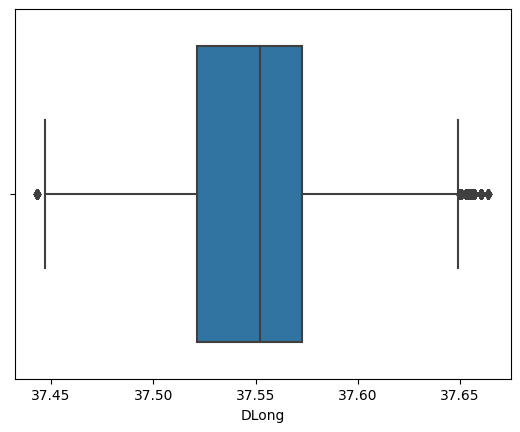

In [ ]:
sns.boxplot(x=df['DLong'])

Removing the unwanted columns or features

In [146]:
df = df.drop('Unnamed: 0', axis =1)

Removing the correlated features using heatmap and wrote a function to do so.

<Axes: >

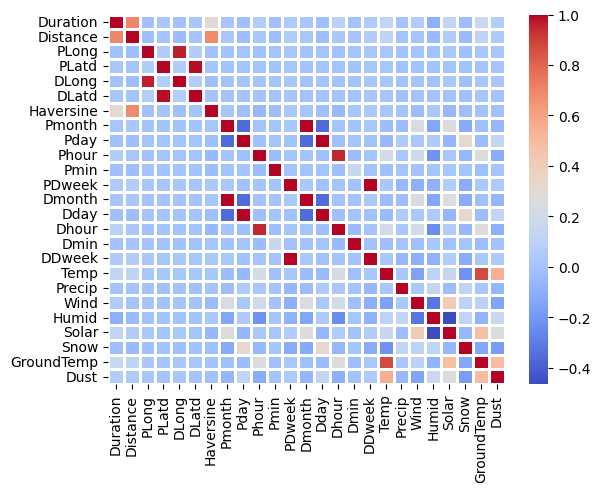

In [ ]:
sns.heatmap(data=df.corr(),cmap='coolwarm', lw = 1)

To understand the cluster analysis.

In [ ]:
# import scipy
# from scipy.cluster import hierarchy as hc
# X = df

# corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
# corr_condensed = hc.distance.squareform(1-corr)
# z = hc.linkage(corr_condensed, method='average')
# fig = plt.figure(figsize=(16,10))
# dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
# plt.show()

In [147]:
#Removing the correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(df, 0.8)
df_drop = df.drop(corr_features,axis=1)

In [148]:
df_drop.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'Haversine', 'Pmonth', 'Pday',
       'Phour', 'Pmin', 'PDweek', 'Dmin', 'Precip', 'Wind', 'Humid', 'Solar',
       'Snow', 'Dust'],
      dtype='object')

In [149]:
df_drop.shape

(374847, 17)

<Axes: >

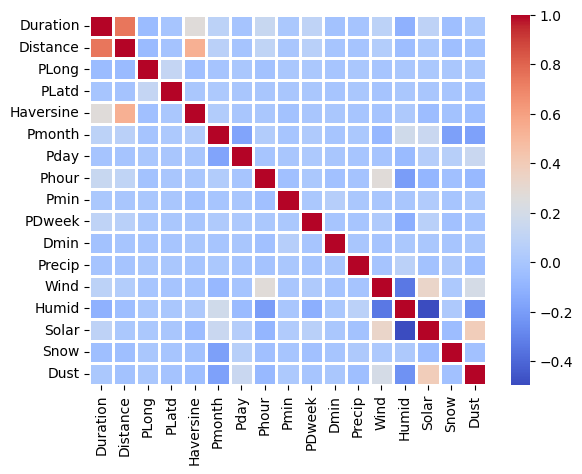

In [28]:
sns.heatmap(data=df_drop.corr(),cmap='coolwarm', lw = 1)

So as we can see, all the correlated features are removed and we have reduced our features from 25 to 18.

There is no more correlated features in the dataset

## EDA

In [ ]:
data1 = df['Dday']
data2 = df['Dhour']
data3 = df['Dmin']
data4 = df['Temp']
data5 = df['Wind']
data6 = df['Humid']
data7 = df['Solar']
data8 = df['GroundTemp']
data9 = df['PLong']
data10 = df['PLatd']
data11 = df['DLong']
data12 = df['DLatd']
data13 = df['Pmin']
data14 = df['Haversine']
data15 = df['Pday']
data16 = df['Phour']
data17 = df['Dust']
data18 = df['PDweek']
data19 = df['DDweek']
data20 = df['Precip']
data21 = df['Snow']

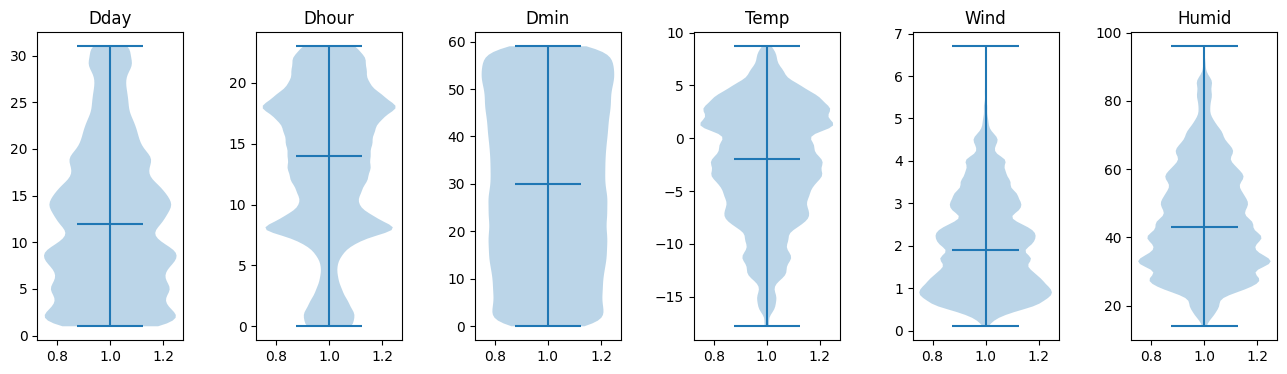

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 8 subplots
fig, axes = plt.subplots(1, 6, figsize=(16, 4))


# Labels for the violin plots
labels = ["Dday", "Dhour", "Dmin", "Temp", "Wind", "Humid"]

# Create violin plots with names
for i, (data, label) in enumerate(zip([data1, data2, data3, data4, data5, data6], labels)):
    ax = axes[i]
    ax.violinplot(data, showmedians=True)
    ax.set_title(label)  # Set the title for each subplot

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)  # You can adjust the value (0.5 in this case) to control the spacing

# Show the plot
plt.show()


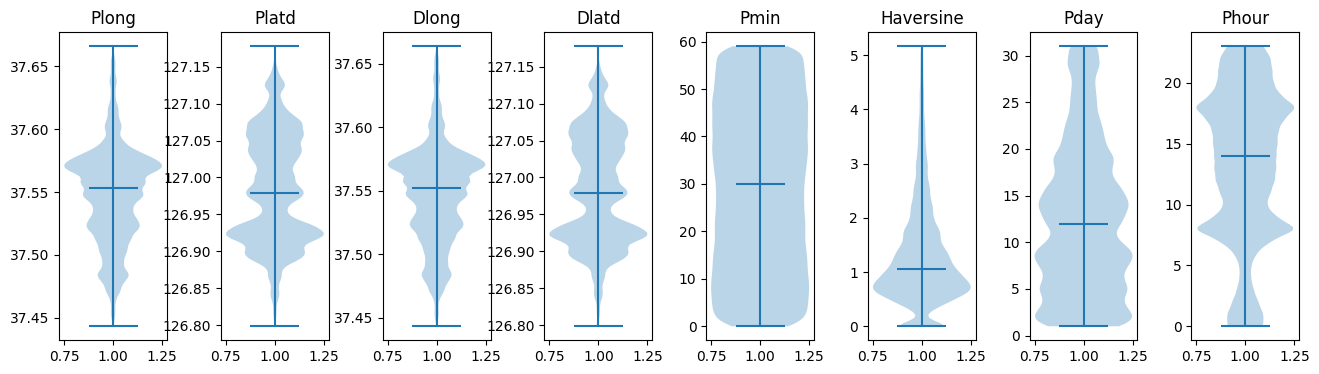

In [ ]:
# Create a figure with 8 subplots
fig, axes = plt.subplots(1, 8, figsize=(16, 4))


# Labels for the violin plots
labels = ["Plong", "Platd", "Dlong", "Dlatd", "Pmin", "Haversine", "Pday", "Phour"]

# Create violin plots with names
for i, (data, label) in enumerate(zip([data9, data10, data11, data12, data13, data14, data15, data16], labels)):
    ax = axes[i]
    ax.violinplot(data, showmedians=True)
    ax.set_title(label)  # Set the title for each subplot

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)  # You can adjust the value (0.5 in this case) to control the spacing

# Show the plot
plt.show()

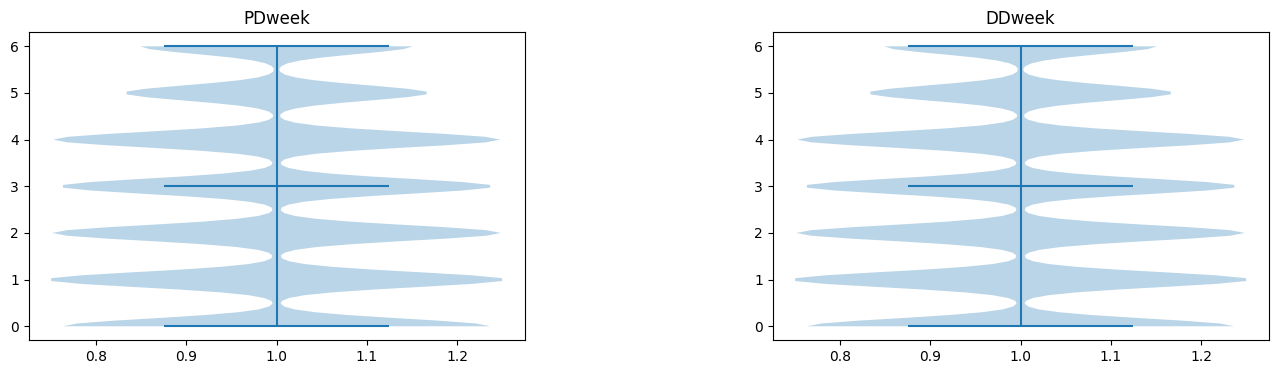

In [ ]:
# Create a figure with 8 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))


# Labels for the violin plots
labels = ["PDweek", "DDweek"]

# Create violin plots with names
for i, (data, label) in enumerate(zip([data18, data19], labels)):
    ax = axes[i]
    ax.violinplot(data, showmedians=True)
    ax.set_title(label)  # Set the title for each subplot

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)  # You can adjust the value (0.5 in this case) to control the spacing

# Show the plot
plt.show()

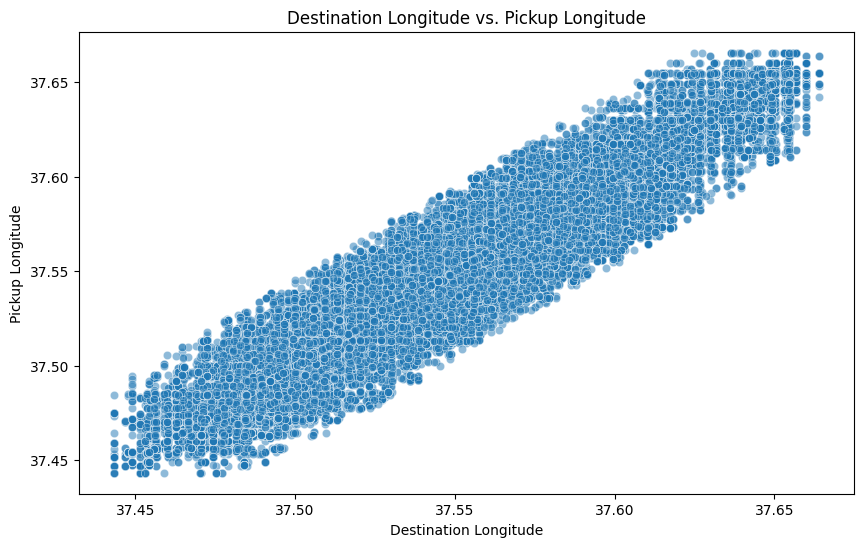

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DLong', y='PLong', data=df, alpha=0.5)
plt.xlabel('Destination Longitude')
plt.ylabel('Pickup Longitude')
plt.title('Destination Longitude vs. Pickup Longitude')
plt.show()

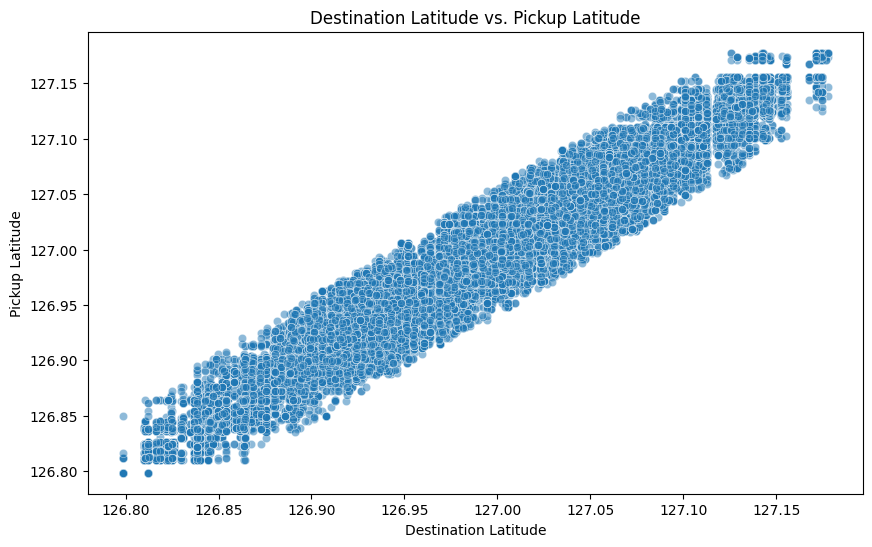

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DLatd', y='PLatd', data=df, alpha=0.5)
plt.xlabel('Destination Latitude')
plt.ylabel('Pickup Latitude')
plt.title('Destination Latitude vs. Pickup Latitude')
plt.show()

There is a linear relationships between these garphs and features. There fore they are highly correlated. There we need to drop any of of those feature to make model efficient.

Therefore, we chose to drop Destination Longitude and Destination Latitude.

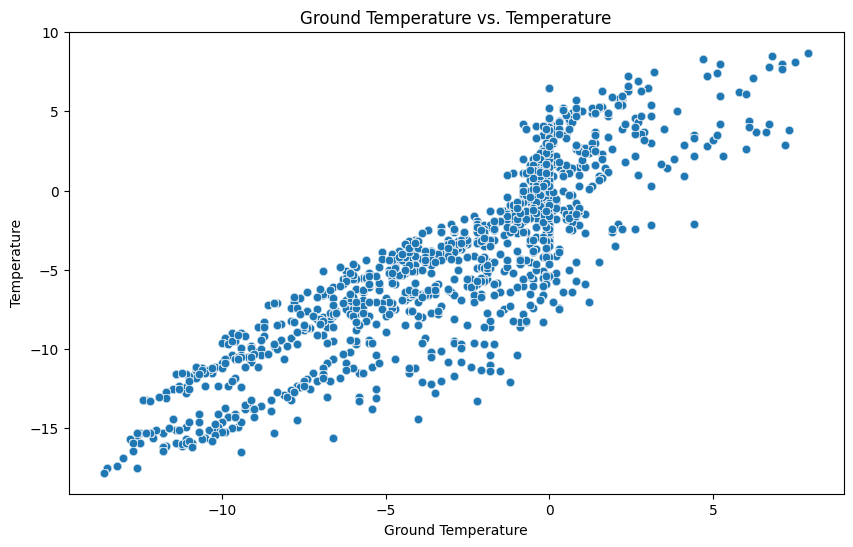

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GroundTemp', y='Temp', data=df, alpha=0.5)
plt.xlabel('Ground Temperature')
plt.ylabel('Temperature')
plt.title('Ground Temperature vs. Temperature')
plt.show()

There is a linear relationships between these garphs and features. There fore they are highly correlated. There we need to drop any of of those feature to make model efficient.
Therefore, we chose to drop Ground temperature.

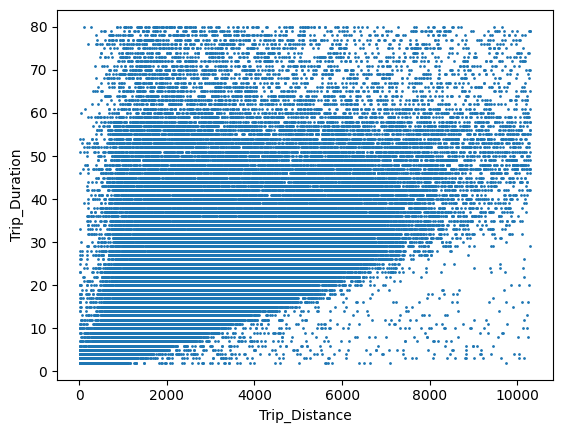

In [ ]:
trip_dist = df['Distance']
trip_dur = df['Duration']
plt.scatter(trip_dist, trip_dur, s = 1)
plt.xlabel('Trip_Distance')
plt.ylabel('Trip_Duration')
plt.show()

Plotted this just to understand the distribution between Trip Duration anf Trip Distance.

Text(0.5, 0, 'Pickup_Hour')

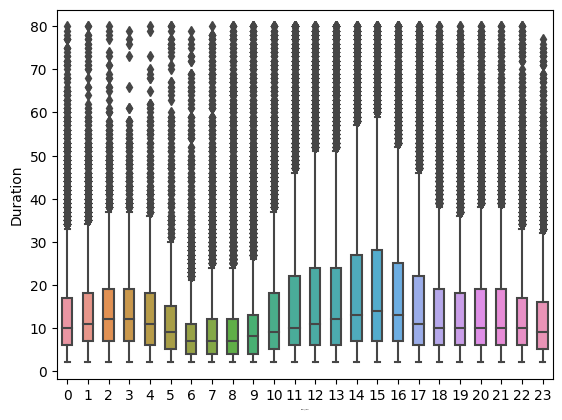

In [ ]:
sns.boxplot(x = df['Phour'], y = df['Duration'], width = 0.5).set_xlabel("Pickup_Hour", fontsize=1)

These are the boxplots representing each hour of the day with the duration it takes.

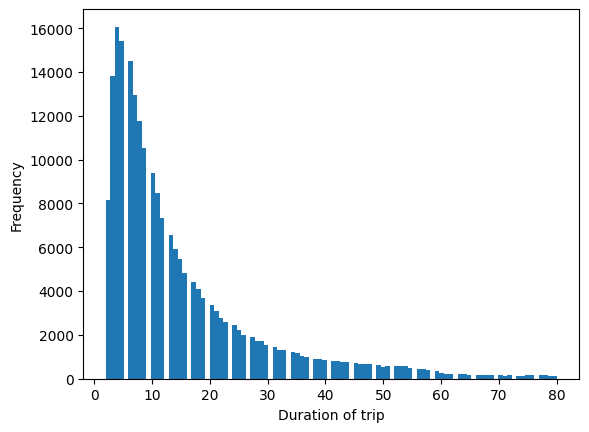

In [ ]:
plt.hist(df['Duration'].values, bins=100)
plt.xlabel('Duration of trip')
plt.ylabel('Frequency')
plt.show()

As we can observe people mostly hired nikes for short durations. Trips upto 40 hours were highly prefered.

Text(0.5, 0, 'Distance')

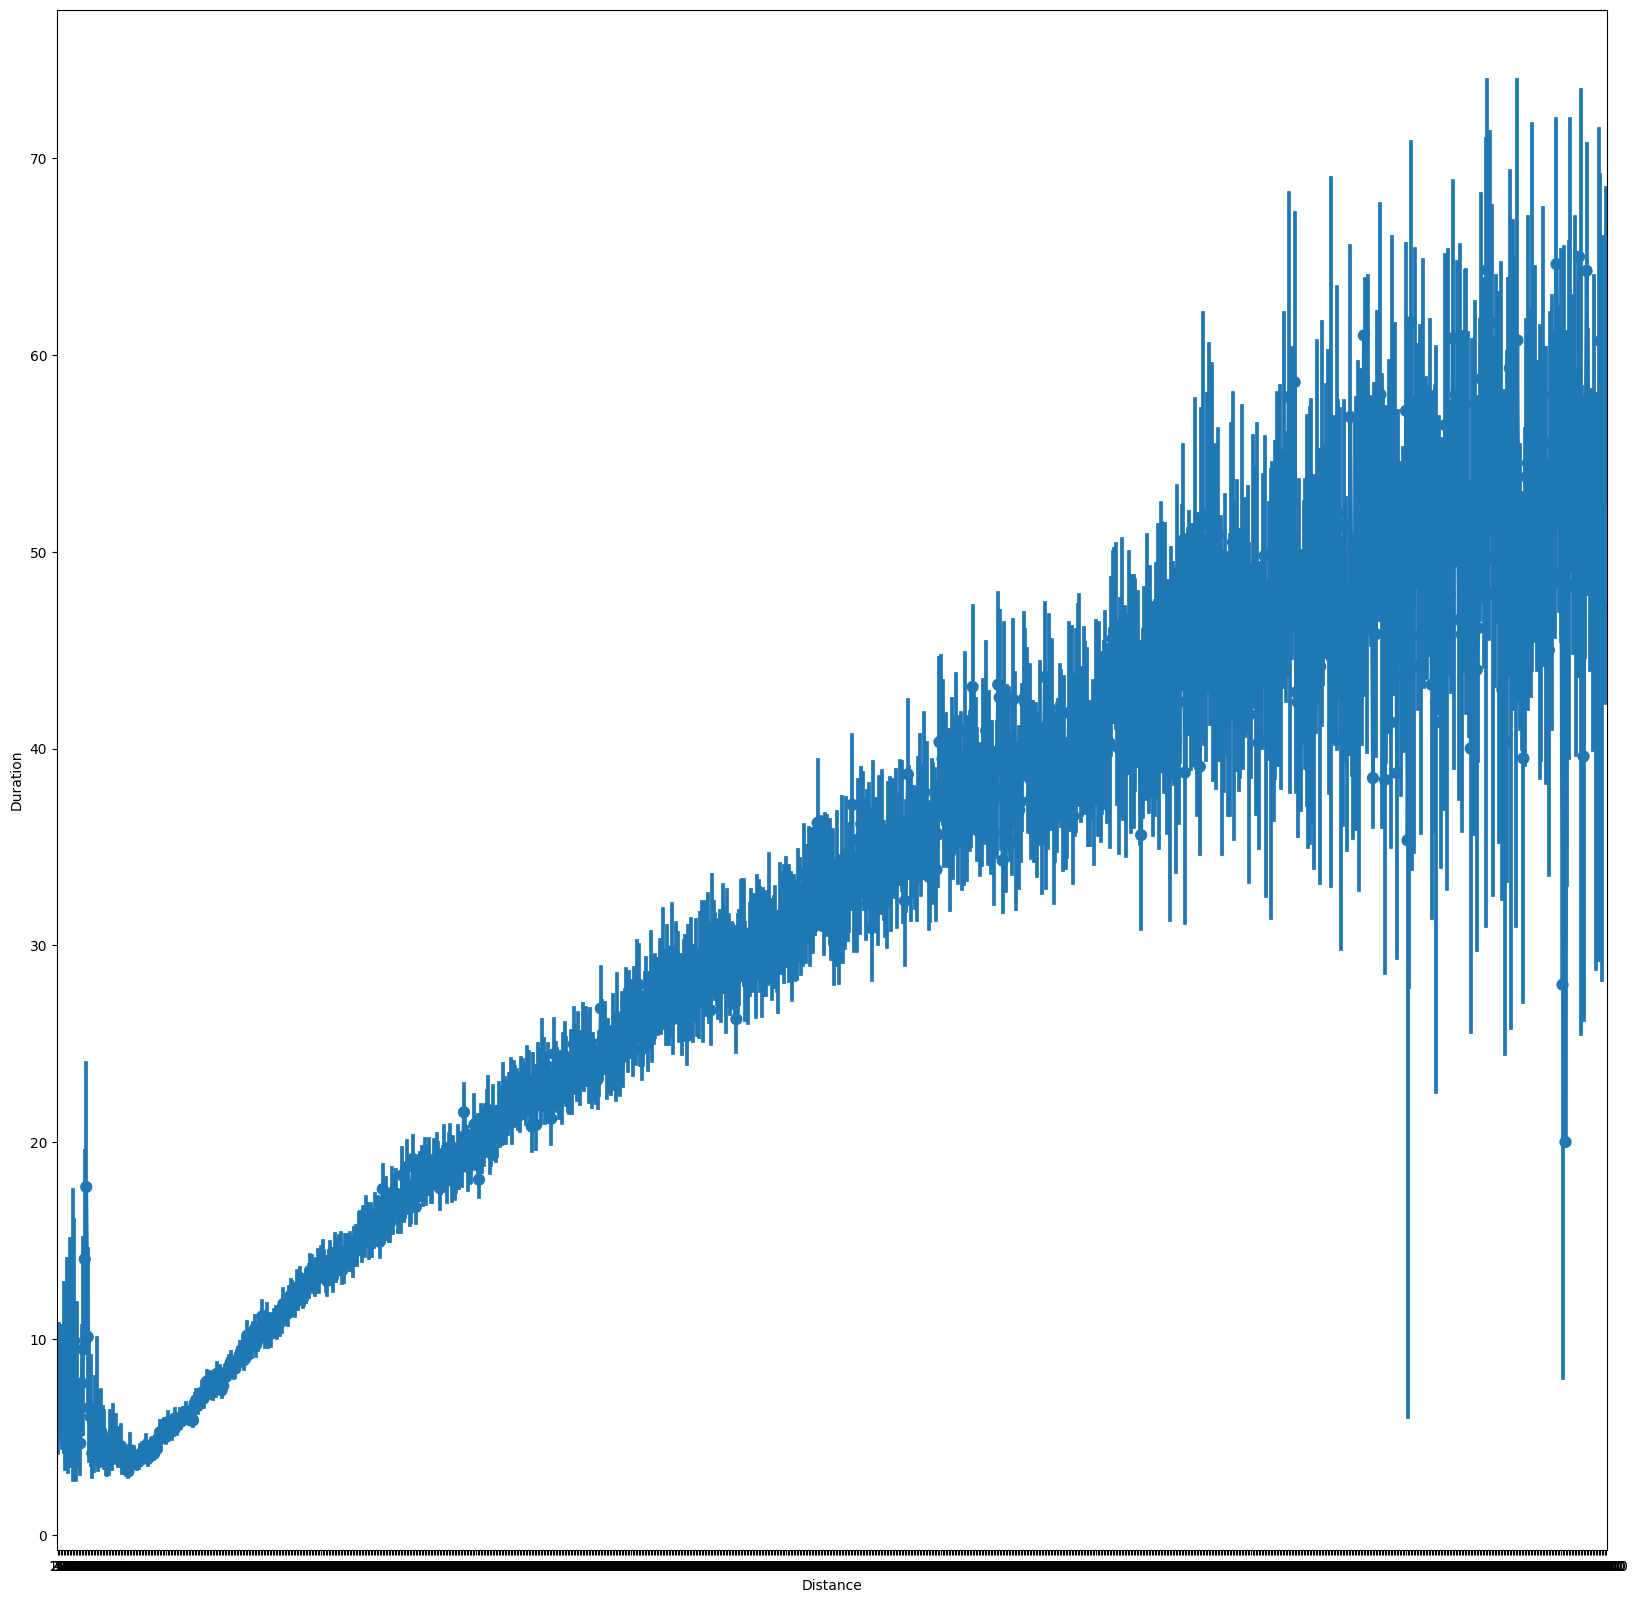

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(20, 20)
sns.pointplot(y = df.Duration,x=df.Distance,orient="v").set_xlabel("Distance")

In [150]:
df2= df[df.index % 3 == 0]

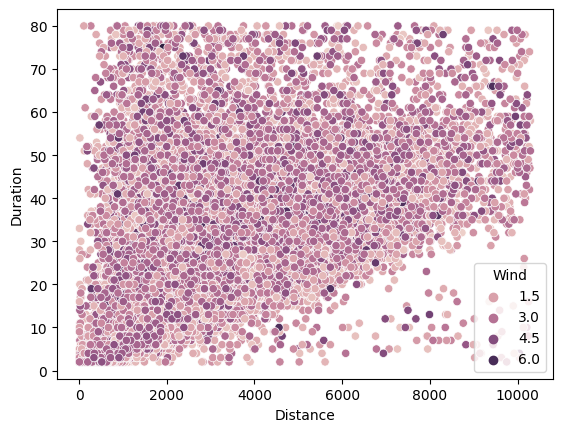

In [ ]:
ax = sns.scatterplot(x=df2["Distance"], y=df2["Duration"], hue=df2["Wind"], sizes=(20, 200))

The feature wind does not seem to be important in determining the Duration.

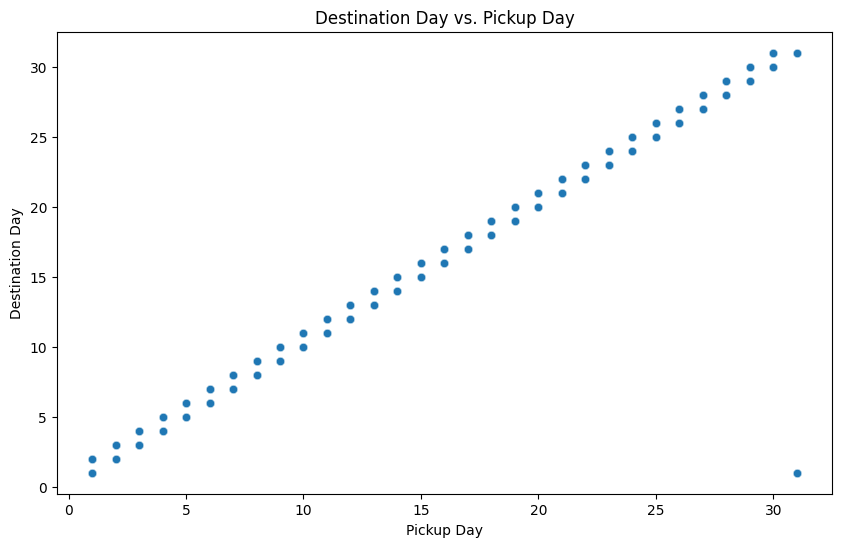

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Dday', x='Pday', data=df, alpha=0.5)
plt.ylabel('Destination Day')
plt.xlabel('Pickup Day')
plt.title('Destination Day vs. Pickup Day')
plt.show()


(1.0, 1.0): This data point represents cases where both the "Destination Day" and "Pickup Day" are equal to 1.0. In other words, both the destination and pickup occurred on the same day (Day 1).

(2.0, 1.0): This data point represents cases where the "Destination Day" is 2.0 (Day 2), and the "Pickup Day" is 1.0 (Day 1). This suggests that there are cases where the destination occurred on a different day (Day 2) compared to when the pickup occurred (Day 1).

Based on these two observations, we can make the following conclusions:

There appears to be limited variation in the data regarding the "Destination Day" and "Pickup Day" variables, with most cases falling into the categories mentioned above. The data suggests that a significant portion of the trips either begin and end on the same day (Day 1) or have the destination occurring one day after the pickup (Day 2 and Day 1).

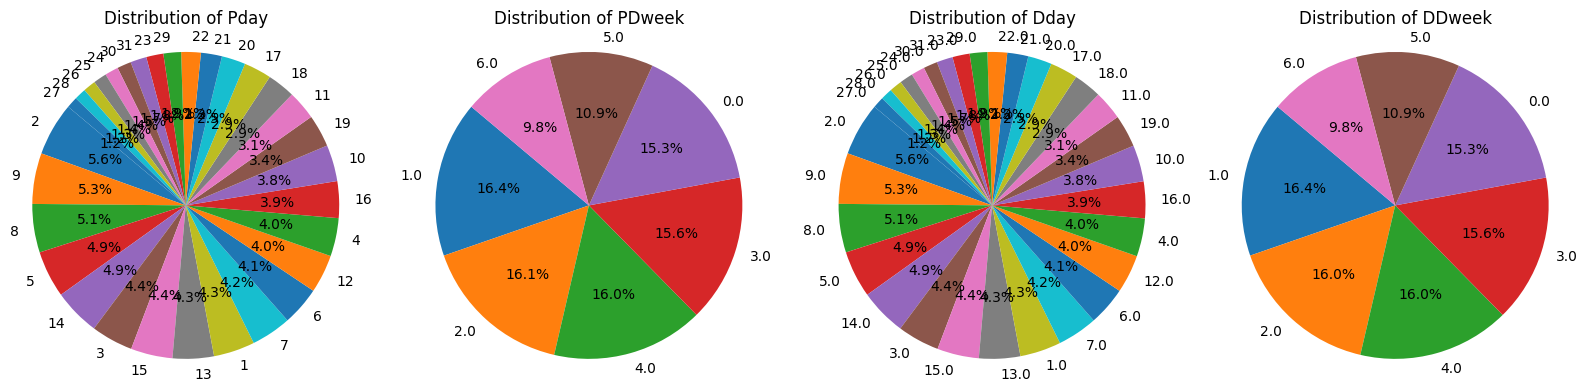

In [ ]:
# Categorical columns
categorical_columns = ['Pday', 'PDweek', 'Dday', 'DDweek']

# Create subplots for the categorical columns
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(16, 4))

# Create pie charts for each categorical column
for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


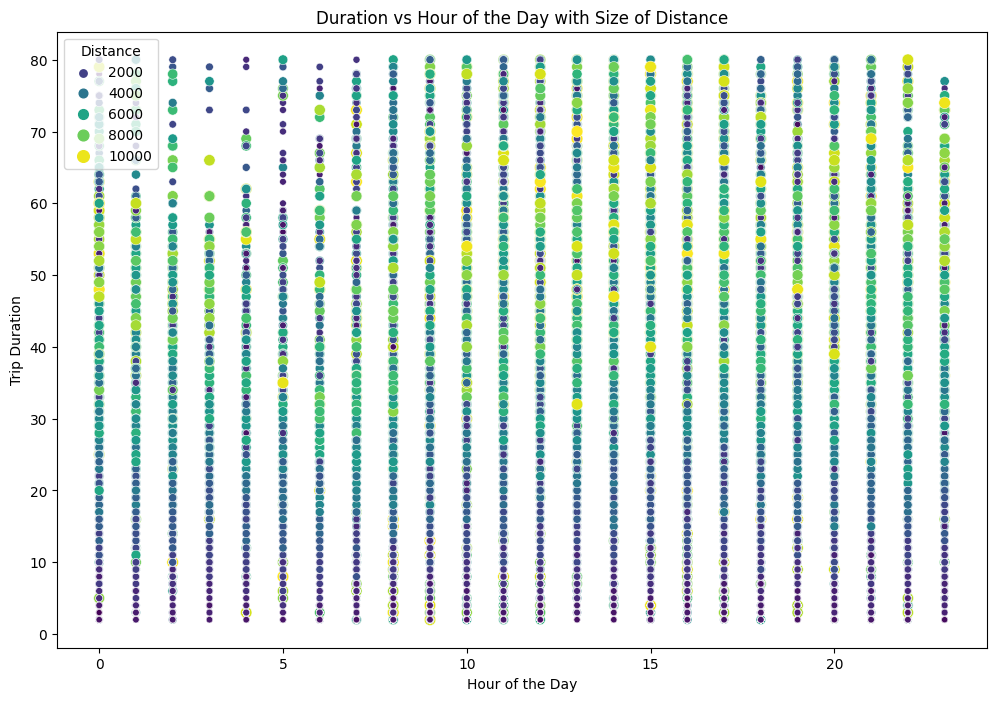

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Phour', y='Duration', data=df, hue='Distance', size='Distance', palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration')
plt.title('Duration vs Hour of the Day with Size of Distance')
plt.legend(title='Distance')
plt.show()


on every day there is a switch between the colors that signifies that duration of trip changes with distance and there are certain points, whuch are yellow but found at the bottom where, darker colors were supposed to be present and vice versa. Therefore, there is an anomaly, that might have happened due to varied weather conditions.

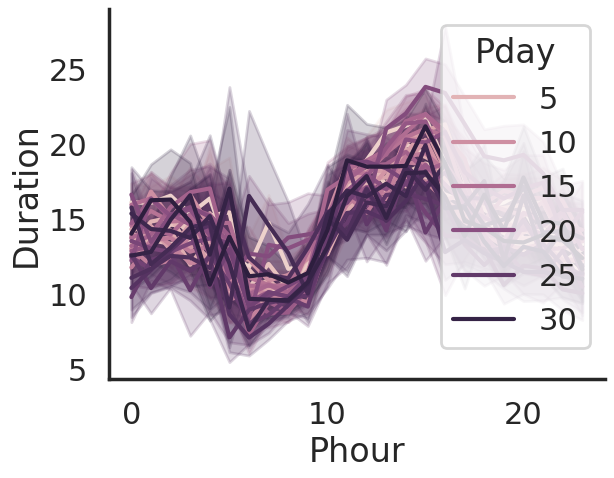

In [ ]:
sns.set(style="white", palette="muted", color_codes=False)
sns.set_context("poster")

sns.lineplot(data=df, x="Phour", y="Duration", hue="Pday")

sns.despine(bottom=False)

plt.show()  # Show the plot

# Model Training and Data Transformations

**Model Training and Data Transformations** 

Training the machine learning model involves several steps, including data preprocessing (already done), feature engineering, model selection, training, and evaluation. 

Then as the dataset has been transformed and the unwanted features have been removed, we decided that we would predict the duration of the trip as that would benefit the bike rental about how to efficiently plan providing their rides and charge accordingly. What rental companies will do is, they will have charges according to the duraetion it takes, the only thing the customer has to enter is the pick-up place and time along with destination place and time, other features act as per the situation and thus giving proper pricing.

Importing the required libraries

In [201]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn import metrics
import math
# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

Selecting the feature and target classes and training the model.

In [202]:
X = df_drop.drop(columns=['Duration'])
y = df_drop['Duration']

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [204]:
X_train.head()

,Distance,PLong,PLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmin,Precip,Wind,Humid,Solar,Snow,Dust
384329,1510,37.537849,127.092171,1.373202,3.0,7.0,17.0,45.0,2.0,55.0,0.0,1.0,37.0,0.67,0.0,26.0
509053,7020,37.531860,127.067192,3.752554,3.0,16.0,15.0,19.0,4.0,57.0,0.0,1.9,32.0,2.62,0.0,26.0
140629,1270,37.479916,126.902840,0.996151,1.0,27.0,11.0,3.0,5.0,10.0,0.0,1.1,33.0,0.90,0.3,54.0
1404302,2110,37.550236,127.073822,2.125292,4.0,30.0,20.0,51.0,0.0,13.0,0.0,2.4,69.0,0.00,0.0,58.0
324173,1610,37.548645,126.912827,1.012374,3.0,2.0,1.0,18.0,4.0,47.0,0.0,2.1,52.0,0.00,0.0,39.0


In [205]:
y_train.head()

384329      8
509053     38
140629      6
1404302    21
324173     28
Name: Duration, dtype: int64

**Data Standarization**

Standardizing features by removing the mean and scaling to unit variance.

In [206]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((299877, 16), (74970, 16))

In [157]:
X_train_scaled

array([[-6.27668823e-01, -2.40838732e-01,  1.27860742e+00, ...,
        -2.42781043e-01, -8.03979948e-02, -5.28050665e-01],
       [ 1.42927255e+00, -3.81099988e-01,  9.67240520e-01, ...,
         1.66027033e+00, -8.03979948e-02, -5.28050665e-01],
       [-7.17263366e-01, -1.59761871e+00, -1.08143130e+00, ...,
        -1.83185734e-02,  1.91812452e+00,  4.98921613e-01],
       ...,
       [-8.81520027e-01, -2.21039810e+00,  8.69862793e-01, ...,
        -8.77131502e-01, -8.03979948e-02, -1.22492471e+00],
       [-8.29256544e-01,  2.53319305e-01, -1.02019003e+00, ...,
         1.19990229e-03, -8.03979948e-02, -1.33495746e+00],
       [ 1.07462748e+00,  1.72450694e-01, -6.63848880e-01, ...,
        -1.25670189e-01, -8.03979948e-02, -1.00485922e+00]])

In [158]:
X_test_scaled

array([[ 3.41320727, -0.29778074, -1.07171339, ...,  1.46287656,
        -0.08082964,  2.46742027],
       [-0.58667929,  2.05145679, -0.88078959, ...,  0.30149904,
        -0.08082964, -0.48732172],
       [ 0.02183778,  2.34918909,  1.08090253, ..., -0.84035953,
        -0.08082964, -1.18040935],
       ...,
       [-0.64233634, -0.48910524,  0.48655876, ..., -0.6549295 ,
        -0.08082964,  1.04476672],
       [-0.86496453,  2.35363633,  0.89845317, ...,  1.55071184,
        -0.08082964,  1.37307139],
       [ 0.99398089, -0.66976567, -0.79294222, ..., -0.22551261,
        -0.08082964,  0.42463569]])

In [159]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train),rmse(m.predict(X_test), y_test),
           m.score(X_train, y_train),m.score(X_test, y_test),
           metrics.mean_absolute_error(m.predict(X_train), y_train),metrics.mean_absolute_error(m.predict(X_test), y_test),

          ]


    print(f" RMSE on training set: {res[0]} \n RMSE on test set: {res[1]} \n Score or Accuracy on training set: {res[2]} \n Score or Accuracy on test set: {res[3]} \n Mean absolute error on training set:{res[4]} \n Mean absolute error on test set :{res[5]} ")

**Model Selection** 

Choosing appropriate machine learning algorithms for the regression problem. For predicting bike trip duration, we will use algorithms like linear regression, random forests, polynomial regression, and gradient boosting.

**Linear Regression Model**

In [160]:
lModel = LinearRegression()
lModel.fit(X_train,y_train)
print_score(lModel)

 RMSE on training set: 12.990046893245124 
 RMSE on test set: 12.95112346023935 
 Score or Accuracy on training set: 0.6025925219131515 
 Score or Accuracy on test set: 0.6081444473394659 
 Mean absolute error on training set:8.293323735990935 
 Mean absolute error on test set :8.27439718656151 


Observation: 

The accuracy of the training data is 60.25% while that of test data is 60.14% so the model is decently on both the training and validation set.

**Random Forest Regressor**

In [161]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print_score(rfr)

 RMSE on training set: 3.955170104691026 
 RMSE on test set: 10.533886432983346 
 Score or Accuracy on training set: 0.9631578530682369 
 Score or Accuracy on test set: 0.7407681363564813 
 Mean absolute error on training set:2.2015200025661317 
 Mean absolute error on test set :5.909861417900493 


Observation: 

The accuracy of the training data is 96.63% while that of test data is 74.07%, with very low RMSE score, and the accuracy of test set will get better if we use grid search for hyperparameter tuning. So, we chose to use this model for our Machine Learning pipeline.

Observation

**Gradient Boosting Linear Regression**

In [164]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)
print_score(GBR)

 RMSE on training set: 11.780071959729439 
 RMSE on test set: 11.824006752119638 
 Score or Accuracy on training set: 0.6740410124030578 
 Score or Accuracy on test set: 0.669929892418016 
 Mean absolute error on training set:7.171152640817694 
 Mean absolute error on test set :7.21225581601004 


Observation: 

The accuracy of the training data is 67.40% while that of test data is 66.99%, this model also performs decently on the given data set.

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)
print_score(xgbr)

 RMSE on training set: 7.977927537151455 
 RMSE on test set: 8.341500081156621 
 Score or Accuracy on training set: 0.6676455574171588 
 Score or Accuracy on test set: 0.6384648089472718 
 Mean absolute error on training set:4.405764939365951 
 Mean absolute error on test set :4.636637494183386 


Observation: 

The accuracy of the training data is 66.76% while that of test data is 63.84%, this model also performs decently on the given data set.

**Decision Tree Regression**

In [207]:
DTR = DecisionTreeRegressor(max_depth=10)
DTR.fit(X_train,y_train)
print_score(DTR)

 RMSE on training set: 11.281393756760098 
 RMSE on test set: 11.827801589438186 
 Score or Accuracy on training set: 0.7002631679740836 
 Score or Accuracy on test set: 0.6731720577172966 
 Mean absolute error on training set:6.823815474722913 
 Mean absolute error on test set :7.0969792302915895 


Observation: 

The accuracy of the training data is 70.02% while that of test data is 67.31%, this model also performs decently on the given data set.

The random forest regression and the XGB regressor performs well on the data

**Feature Engineering**

In [208]:
#Plot of feature importance
def rf_feat_importance(rfr, X_train):
    return pd.DataFrame({'cols':X_train.columns, 'imp':rfr.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [209]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(7,4), legend=False)

<Axes: ylabel='cols'>

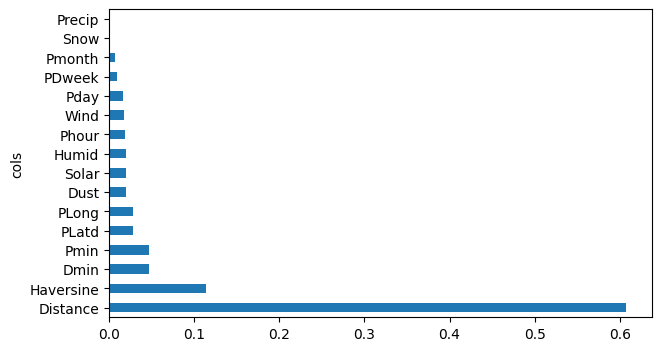

In [211]:
fi = rf_feat_importance(rfr, X_train)
plot_fi(fi)


This plot helps us to identify which features have the most significant impact on our model's predictions and guides feature selection and interpretation of our model. As seen from the plot, trip distance is the most important feature of the data.

In [ ]:
rfr_grid = {'n_estimators': list(range(80, 120, 20)), 'max_features': list(range(1, 10, 1))}
rfr = RandomForestRegressor()
rfr_grid_search = GridSearchCV(
    rfr,
    param_grid= rfr_grid,
    cv=3,
    verbose=0,
    n_jobs=-1
)

rfr_grid_search.fit(X_train_scaled, y_train)

In [ ]:
print("Best Hyperparameters:", rfr_grid_search.best_params_)

# Evaluate the best model on your test data
best_rfr_model = rfr_grid_search.best_estimator_

Conclusion:

The results of the hyperparameter tuning on the RandomForest Regressor increases the accuracy of the model. The hyperparameters like n_estimators, max_depth, max_features are tuned using Grid Search and we got the optimum result using the Random Forest Regressor as compared to any other evaluation model.